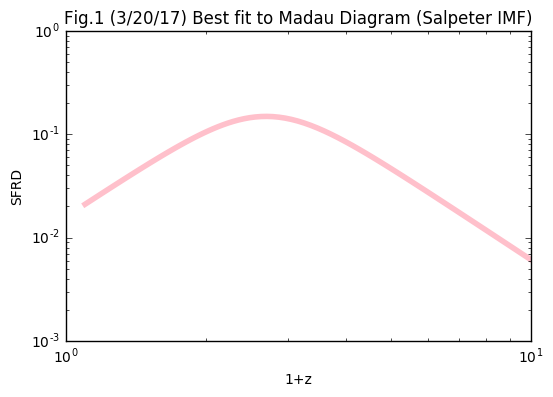

In [1]:
#############################################################
##### intergrate the SFRD curve to get total stellar mass ###
#############################################################

A,B,C,D = 0.01594907,  2.94688778,  2.70011684,  5.9136489
best_fit_madau = lambda z: A*(1+z)**B/(1+((1+z)/C)**D)
z_arr = logspace(-1,1,100)
loglog(1+z_arr, best_fit_madau(z_arr),c='pink',lw=4)
xlabel('1+z')
ylabel('SFRD')
title('Fig.1 (3/20/17) Best fit to Madau Diagram (Salpeter IMF)')
xlim(1,10)
show()

In [2]:
h = 0.68
Msun = 1.9891e33
kpc = 3.08567758e18*1e3
kB = 1.38064852e-16 # erg/K
mP = 1.6726219e-24 # grams
G = 6.67408e-8 # 6.67408e-11 m^3 kg^-1 s^-2
yr = 31556926.0 # seconds

OmegaM = 0.307115#1#Planck15 TT,TE,EE+lowP+lensing+ext
OmegaV = 1.0-OmegaM
OmegaB = 0.05
#OmegaB_z = lambda z: OmegaB*(1+z)**3 / (OmegaM*(1+z)**3 + OmegaV)
fbary = 0.05/OmegaM
muH = 1.18#1/0.76
mu_tot = 0.62#1/(0.76*2+0.24/4*3)
Hcgs = lambda z: 68.0*sqrt(OmegaM*(1+z)**3+OmegaV)*3.24e-20
rho_cz = lambda z: 0.375*Hcgs(z)**2/pi/G
fstar = 0.14 ## rho_star/rho_bary

from scipy.integrate import quad
func_mdot = lambda z: best_fit_madau(z)/yr*(-1)/(1.0+z)/Hcgs(z)
out = quad(func_mdot,8,0)

rho_bary=log10(rho_cz(0)/Msun*(kpc*1e3)**3 * 0.05)
print '==== matter density in the universe ==========='
print 'log10 baryon density (Msun/Mpc^3): %.3f'%(rho_bary)
print 'log10 stellar density (Msun/Mpc^3, %.3f of baryon): %.3f'%(fstar, rho_bary+log10(fstar))
print 'log10 stellar density (Msun/Mpc^3, integrate curve from z=[0,8] ): %.3f'%(log10(out[0]))


==== matter density in the universe ===========
log10 baryon density (Msun/Mpc^3): 9.807
log10 stellar density (Msun/Mpc^3, 0.140 of baryon): 8.953
log10 stellar density (Msun/Mpc^3, integrate curve from z=[0,8] ): 8.954


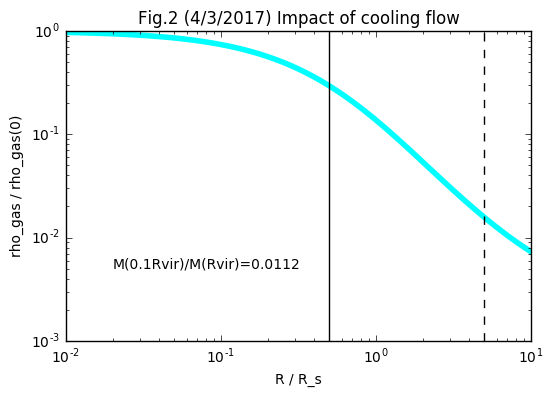

In [8]:
#############################################################
############ test the importance of cooling flow ############
#############################################################
### here I let the central 0.1Rvir gas to cool in M > M_c galaxies
### which I assume is due to the cooling flow
### I also assume that the Mdot into this region is proportional
### to the overall Mdot at Rvir ~ M (0.1Rvir)/M(Rvir)

Cnfw=5.0
fx = lambda x: 1.0 - 1.0/x*log(1+x)
B = 3.0/1.2/(log(2.0) - 0.5)/2.0
ygas_x2 = lambda x: exp(-B*fx(x)) * x**2
Mvir = quad(func_mdot, 0, Cnfw)[0]
M01vir = quad(func_mdot, 0, 0.1*Cnfw)[0]
ratio = M01vir/Mvir

r_arr = logspace(-2, 1,100)
y_arr = exp(-B*fx(r_arr))
loglog(r_arr, y_arr,color='cyan',lw=4)
plot([5,5],[1e-3,1],'k--')
plot([0.5,0.5],[1e-3,1],'k-')

xlabel('R / R_s')
ylabel('rho_gas / rho_gas(0)')
title('Fig.2 (4/3/2017) Impact of cooling flow')
text(2e-2, 5e-3,'M(0.1Rvir)/M(Rvir)=%.4f'%(ratio))
show()